In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("C:\\Users\\anujn\\OneDrive\\Documents\\GitHub\\IPBA_Project_Group_A\\Alt04 -Adidas US Sales Datasets.xlsx")

In [3]:
data.head(2)

Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   

                   Product  Price per Unit  Units Sold  Total Sales  \
0    Men's Street Footwear            50.0        1200     600000.0   
1  Men's Athletic Footwear            50.0        1000     500000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0               0.5     In-store  
1          150000.0               0.3     In-store

In [4]:
import datetime
data['Year'] = pd.DatetimeIndex(data['Invoice Date']).year

# Descriptive Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  Year              9648 non-null   int64         
dtypes: datetime64[ns](1), fl

In [6]:
data.describe()

Retailer ID  Price per Unit   Units Sold    Total Sales  \
count  9.648000e+03     9648.000000  9648.000000    9648.000000   
mean   1.173850e+06       45.216625   256.930037   93273.437500   
std    2.636038e+04       14.705397   214.252030  141916.016727   
min    1.128299e+06        7.000000     0.000000       0.000000   
25%    1.185732e+06       35.000000   106.000000    4254.500000   
50%    1.185732e+06       45.000000   176.000000    9576.000000   
75%    1.185732e+06       55.000000   350.000000  150000.000000   
max    1.197831e+06      110.000000  1275.000000  825000.000000   

       Operating Profit  Operating Margin         Year  
count       9648.000000       9648.000000  9648.000000  
mean       34425.244761          0.422991  2020.865050  
std        54193.113713          0.097197     0.341688  
min            0.000000          0.100000  2020.000000  
25%         1921.752500          0.350000  2021.000000  
50%         4371.420000          0.410000  2021.000000  
75%        52062.500000          0.490000  2021.000000  
max       390000.000000          0.800000  2021.000000

# Uni Variate Analysis

<AxesSubplot:xlabel='Sales Method', ylabel='Count'>

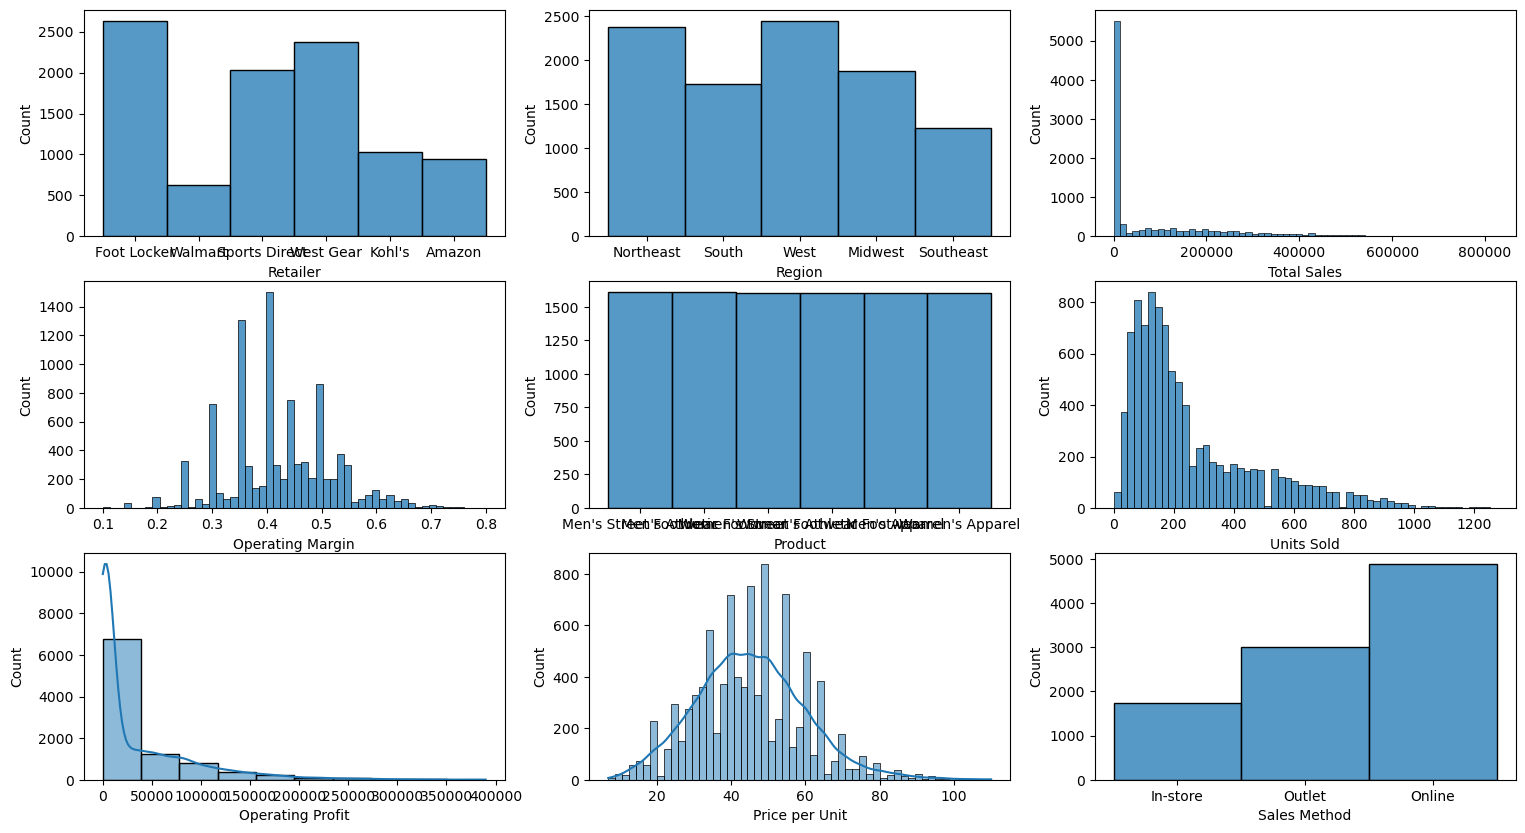

In [7]:
plt.figure(figsize = (25,10))


ax1 = plt.subplot2grid((3,4),(0,0))
sns.histplot(data['Retailer'])

ax1 = plt.subplot2grid((3,4),(0,1))
sns.histplot(data['Region'])

ax1 = plt.subplot2grid((3,4),(0,2))
sns.histplot(data['Total Sales'])

ax1 = plt.subplot2grid((3,4),(1,0))
sns.histplot(data['Operating Margin'])

ax1 = plt.subplot2grid((3,4),(1,1))
sns.histplot(data['Product'])

ax1 = plt.subplot2grid((3,4),(1,2))
sns.histplot(data['Units Sold'])

ax1 = plt.subplot2grid((3,4),(2,0))
sns.histplot(data['Operating Profit'], bins = 10, kde = True)

ax1 = plt.subplot2grid((3,4),(2,1))
sns.histplot(data['Price per Unit'], kde = True)

ax1 = plt.subplot2grid((3,4),(2,2))
sns.histplot(data['Sales Method'])

### HISTOGRAM OBSERVATIONS
1. Footlocker is the most frequent occuring retailer in the dataset
2. Total Sales, Operating profit and Units Sold are interrelated and are **RIGHT SKEWED**
3. 'Price Per unit' is normally distributed. 'Operating Margin' almost takes the shape of a *proper* bell
4. Online sales transaction counts are the highest or most preferred
5. All products are more or less equally distributed
6. North east and West contribute to the most observed regions throughout the dataset

# Bi-variate Analysis

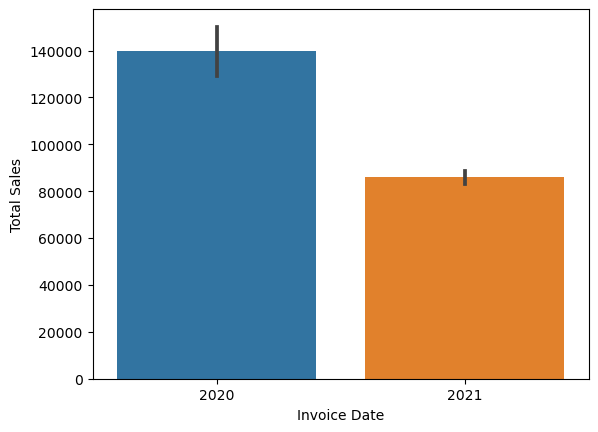

In [8]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales')
plt.show()

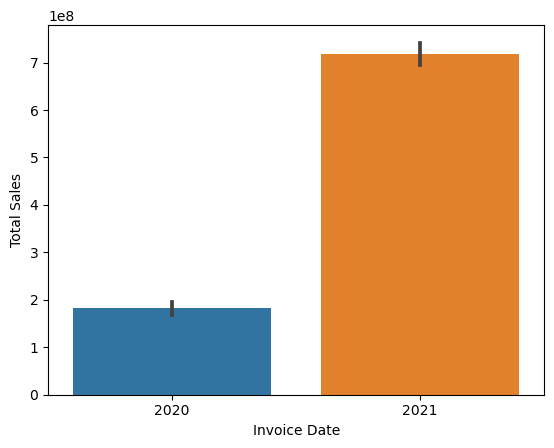

In [9]:
sns.barplot(data = data, x = pd.DatetimeIndex(data['Invoice Date']).year, y = 'Total Sales', estimator=sum)
plt.show()

### Plot 1 : Invoice Date v/s Total Sales - Counts
- There is reduction in number Total Sales Transactions from 2020 to 2021

### Plot 2 : Invoice Date v/s Total Sales - Sum
- There is gain in Total Sales Transactions in absolute terms from 2020 to 2021

## Total unit sold has been considerably larger in 2021 with fewer transactions. i.e. Bulk transactions have happened in 2021 comparing 2020. 

<AxesSubplot:xlabel='Invoice Date', ylabel='Total Sales'>

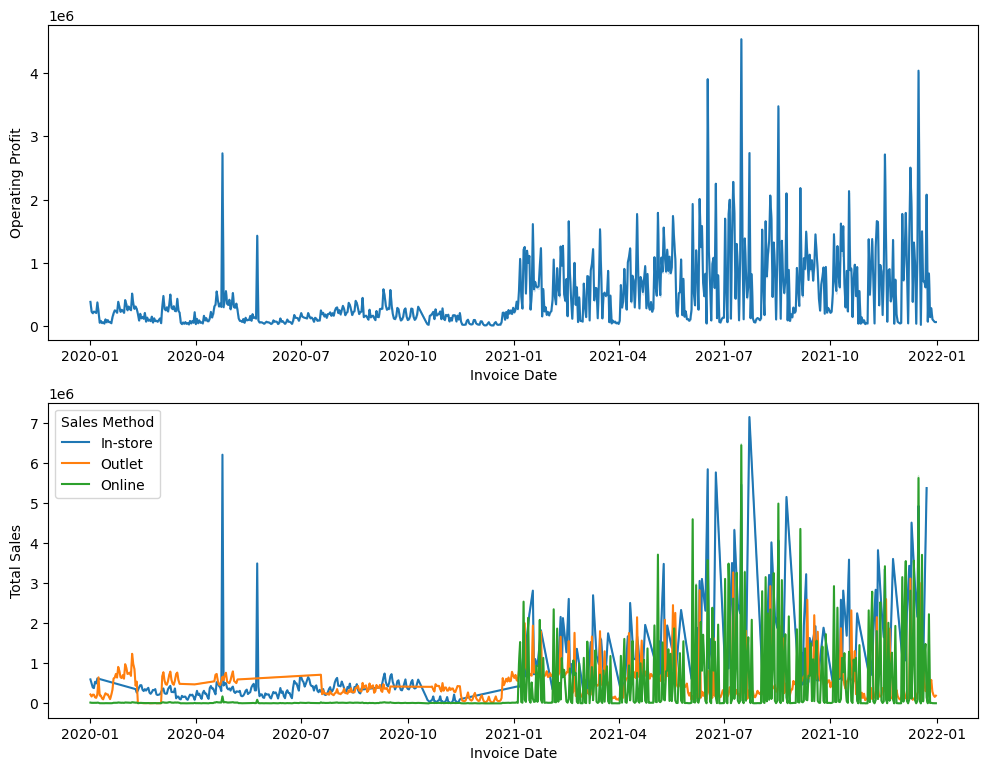

In [10]:
plt.figure(figsize = (12,9))

#Subplot Creation
ax1 = plt.subplot2grid((2,1),(0,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Operating Profit', ci = False, estimator=sum)


ax1 = plt.subplot2grid((2,1),(1,0))
sns.lineplot(data = data, x = 'Invoice Date', y = 'Total Sales', ci = False, hue = 'Sales Method', estimator=sum)


### Plot 1
- Two irregular spikes between 04/2020 and 07/2020
- Proper increase in sales from 2021/01
- The profits stayed consistent post the dip with high spikes after 04/2021, Maximum Profit projected was September 2021

### Plot 2
- Introduction of online sales from 2021 resulted in the spike of Total Sales
- Total Sales from outlets is lowest out of all 3
- Significant increase in In-store sales from 2021

Text(0.5, 1.0, 'Retailer wise YOY Units Sold : Sales method Outlet')

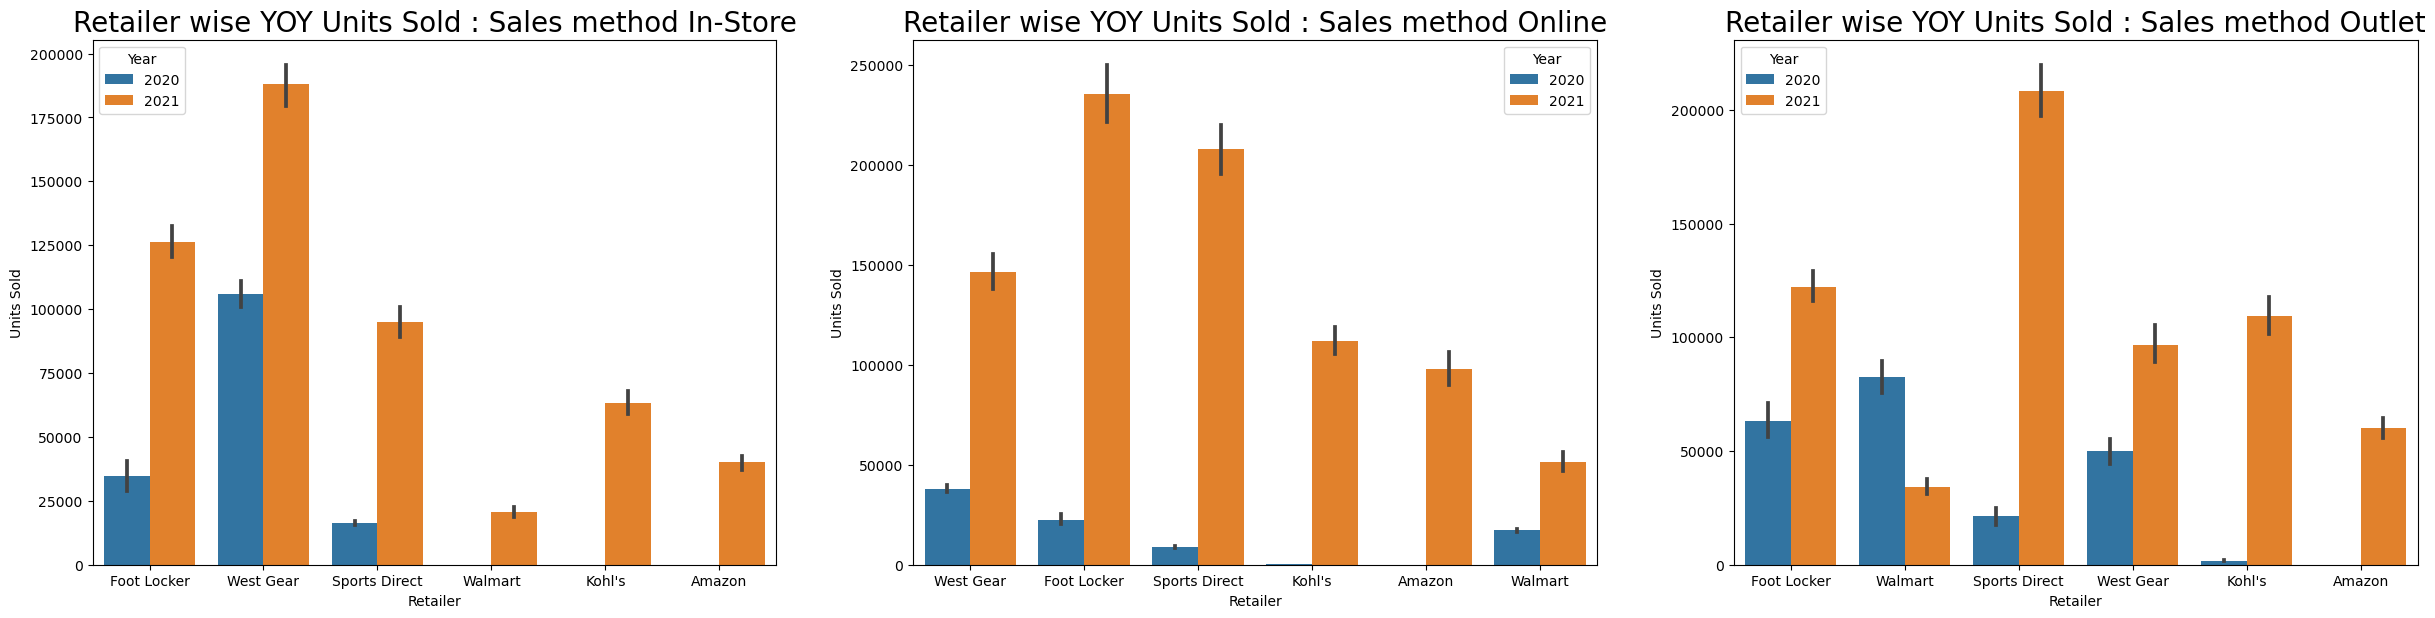

In [11]:
fig = plt.figure(figsize = (30,15))

#Subplot Creation
ax1 = plt.subplot2grid((2,3),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Retailer',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Retailer wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})


## In-store sales- Retailer wise
- West Gear and Foot Locker improved their In-Store sales significantly and maintained their lead in 2021 as well
- Walmart, Kohl's and Amazon also initiated in-store sales in 2021


## Online sales - Retailer wise
- Online Sales via 'Amazon' was started in the year 2021. Kohl's had a massive increase in Online sales as well
- Each Retailer have seen an enormous increase in online sales in 2021 vs 2020. 
- Foot Locker is leading Retailer followed by Sports Direct at the end of 2021 in Online Sales.


## Outlet sales - Retailer wise
- Sports Direct had a massive increase in sales from outlet and is maintaining lead by 2021 among all Retailers
- Walmart is the only retailer which projected less outlet sales in 2021 vs 2020


Text(0.5, 1.0, 'Region wise YOY Units Sold : Sales method Outlet')

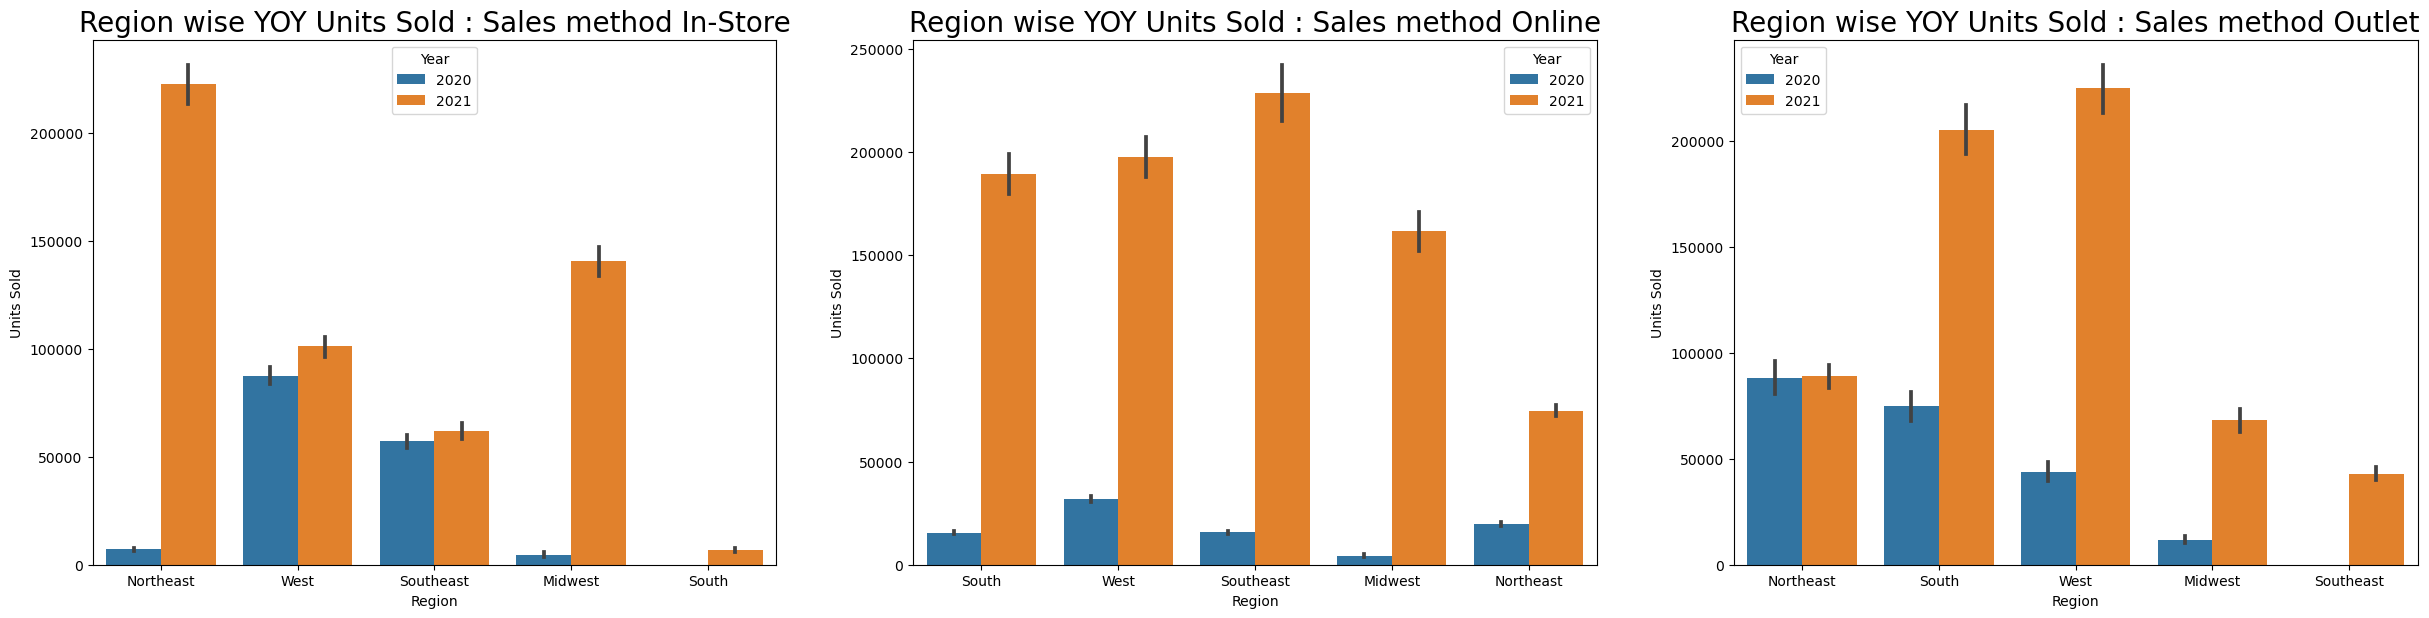

In [12]:
fig = plt.figure(figsize = (30,15))

#Subplot Creation
ax1 = plt.subplot2grid((2,3),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Region',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Region wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})

## Sales Method - Region wise - Sale spread across 2020 and 2021

## In-store sales - Region wise
- Massive improvement in Sales is evident in Northeast and Midwest in 2021.
- West and Southeast region are having comparatively less sales growth in 2021.
- Instore Sales have started in 2021, though is considerable smaller then all other regions.


## Online sales - Region wise
- Each region has grown considerably in Online Sales in 2021 v/s 2020
- Southeast has replaced West and taken lead role in 2021
- South has taken challanger position in 2021 replacing Northeast.


## Outlet sales - Region wise
- Northeast was leading region in 2020 followed by South for Outlet sales whereas West followed by South have taken lead in 2021
- Northeast has almost no growth in sold qty whereas all other regions showed growth in unit sold in 2021
- Southeast Outlets sales started in 2021

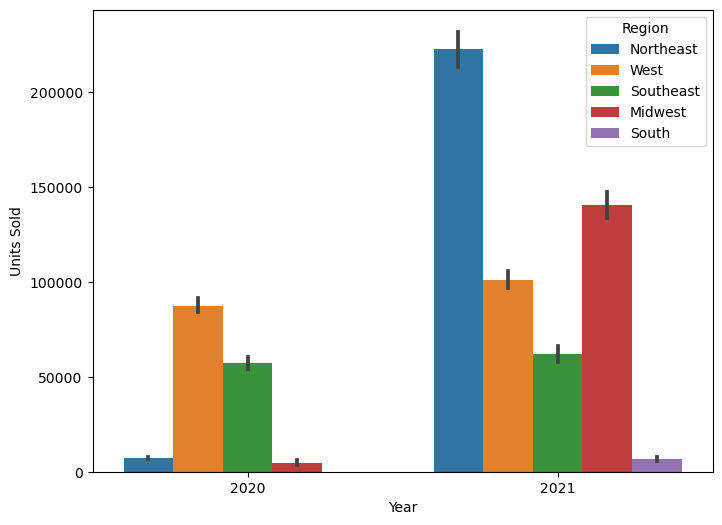

In [13]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data[(data['Sales Method'] == 'In-store')], x = 'Year', y = 'Units Sold', hue = 'Region', estimator=sum)
plt.show()

## Instore Sales Region wise Snapshot 2020 and 2021
- 2020 consisted of 4 regions whereas 2021 consisted of 5 regions 
- South has been introduced in 2021  
- Significant increase in the Northeast and Midwest region, almost stagnant West and Southeast regions

Text(0.5, 1.0, 'Product wise YOY Units Sold : Sales method Outlet')

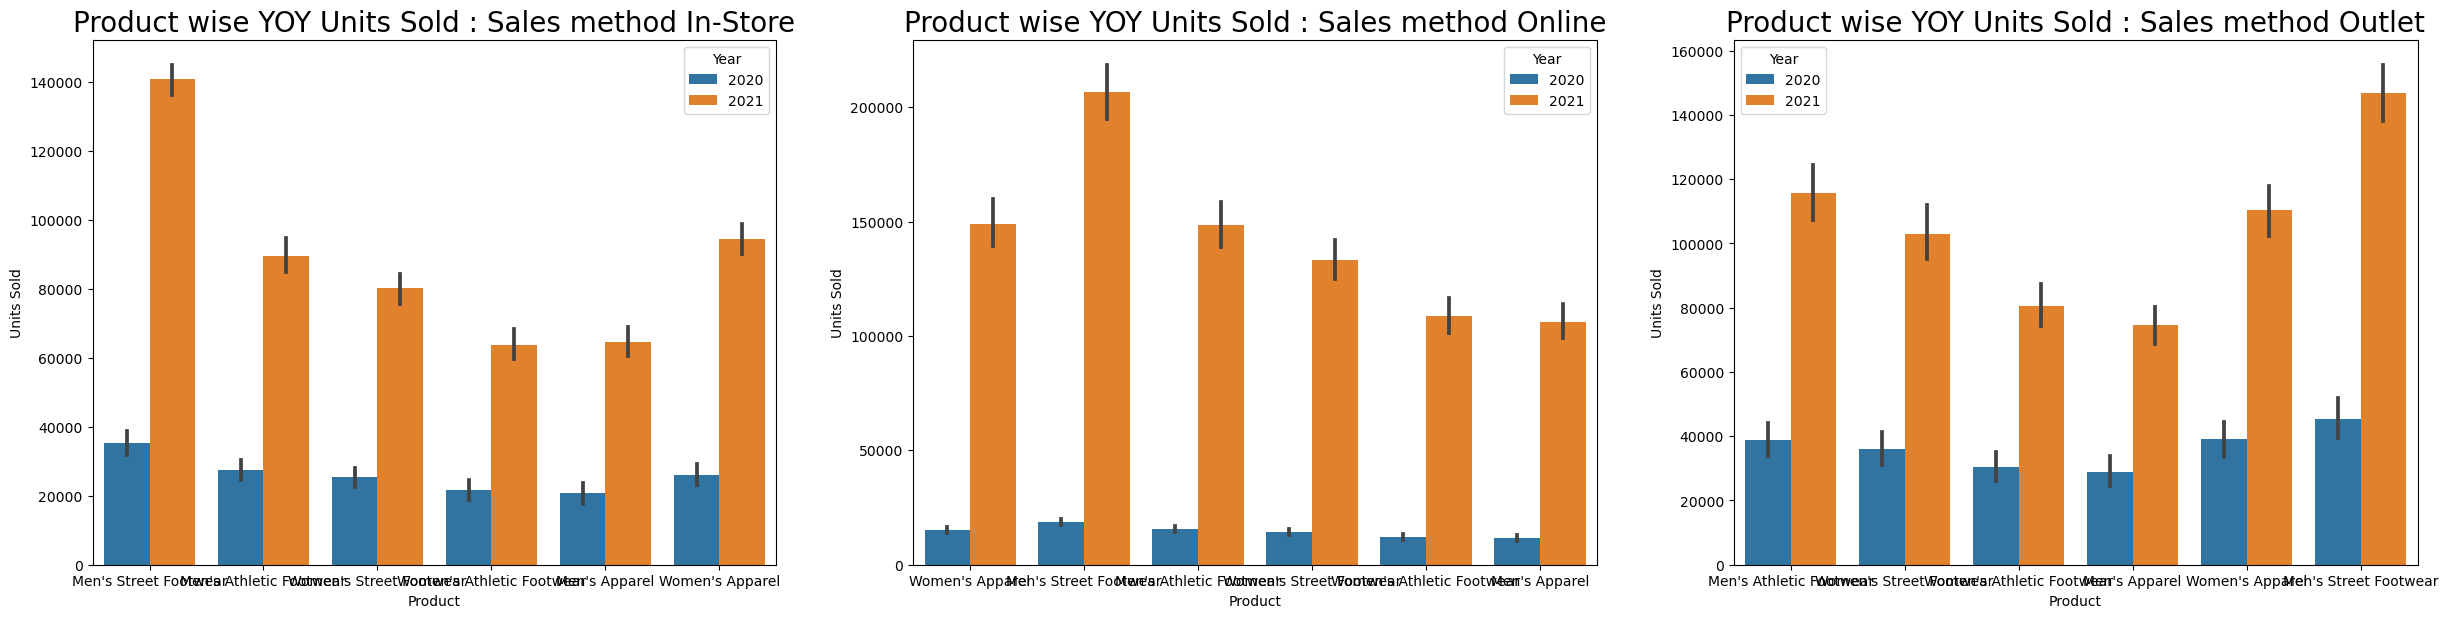

In [14]:
fig = plt.figure(figsize = (30,15))

#Subplot Creation
ax1 = plt.subplot2grid((2,3),(0,0))
sns.barplot(data = data[data['Sales Method'] == 'In-store'], x = 'Product',
            y = 'Units Sold',
            hue = 'Year', 
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method In-Store',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,1))
sns.barplot(data = data[data['Sales Method'] == 'Online'],
            x = 'Product',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method Online',fontdict={'size': 20})

ax1 = plt.subplot2grid((2,3),(0,2))
sns.barplot(data = data[data['Sales Method'] == 'Outlet'], x = 'Product',
            y = 'Units Sold',
            hue = 'Year',
            estimator=sum).set_title('Product wise YOY Units Sold : Sales method Outlet',fontdict={'size': 20})

## Outlet type wise Product Sale spread across 2020 and 2021

## Instore
- All products were getting sold and grown in both year. No new Product introduction or removal in 2021.
- Men's Street footware has grown considerably larger followed byu Women's Appareal

## Online
- Among all products, Men's Street Footware has grown considerably in 2021
- All products have grown their sales through Online mode in 2021.

## Outlet
- All products were having almost unified Outlet presence in 2020, but in 2021 Men's Street Footware was most appealing 
- Men's Athletic Footware and Women's Apparels were having almost equal sales in 2021


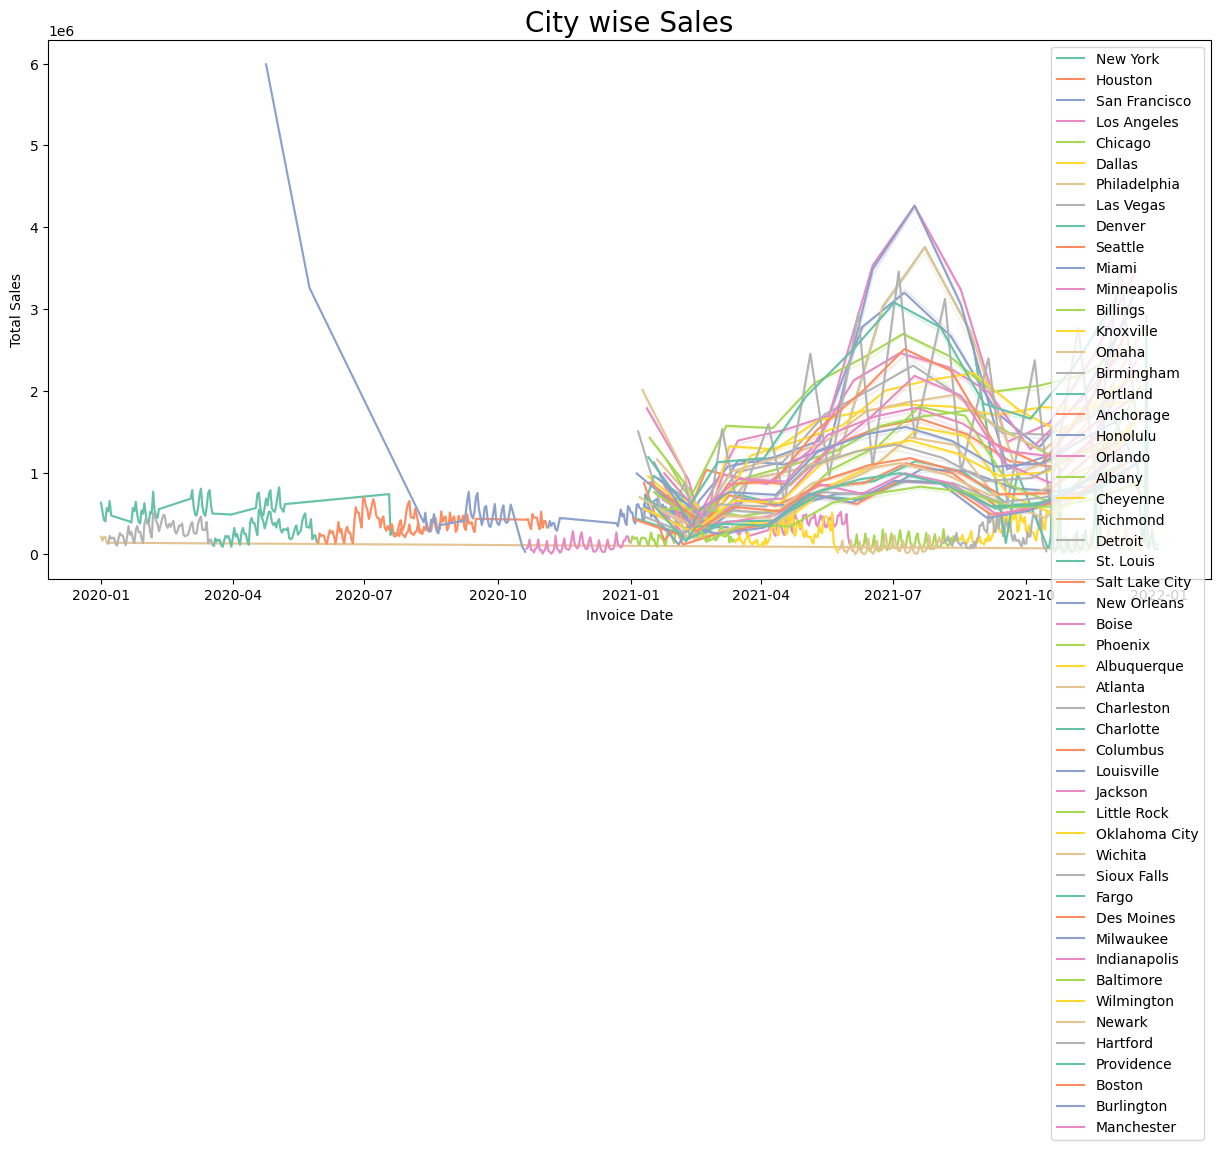

In [15]:
plt.figure(figsize = (15,7))
sns.lineplot(data = data,
             x = 'Invoice Date',
             y = 'Total Sales',
             hue = 'City',
             ci = False,
            palette = 'Set2', estimator=sum).set_title('City wise Sales', fontdict={'size': 20})
plt.legend(loc='upper right')
plt.show()

## Observation
- Few cities in different regions had stints where sales were being made towards in the year 2020
- From Jan 2021, there was a massive influx in number of cities the sales were recorded from 
- This can be due to the option of purchasing online

# CORRELATION

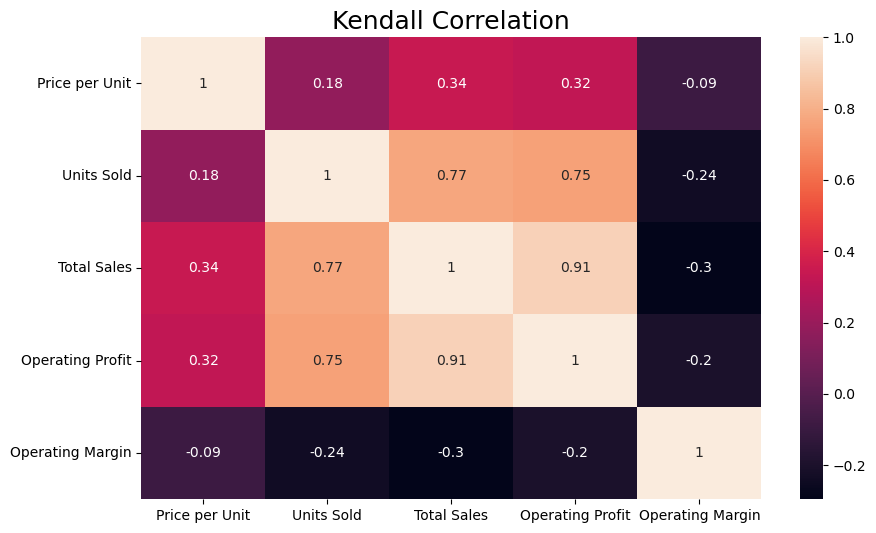

In [16]:
correlationData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
correlation = correlationData.corr(method='kendall')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)
plt.title('Kendall Correlation', size=18)
plt.show()

#print('Features\'s correlation with Target Feature')
#for indx, cor in enumerate(correlation['Total Sales']):
 #   print(correlation.index[indx], cor)

# KEY TAKEAWAYS FROM EDA

1. Total Sales, Operating profit and Units Sold are interrelated and are **RIGHT SKEWED** AND 'Price Per unit' is normally distributed
2. 2021 has seen sudden spike in the Sales and Total sales due to the introduction of sales in a lot more cities.
3. Opening up online platform for sales gained a high influx of overall sales
4. A new region - 'South' was introduced in the year 2021
5. Kohl's, Walmart and Amazon also introduced 'In-store' sales in 2021


# CLUSTERING

### K means Clustering

In [17]:
# Omitting string columns
clusterData = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

#### MIN-MAX SCALING

In [18]:
# Omitting string columns
clusterData1 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData1.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [19]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
minMaxData = pd.DataFrame(minMax.fit_transform(clusterData1),columns = minMax.feature_names_in_)
minMaxData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.417476    0.941176     0.727273          0.769231          0.571429
1        0.417476    0.784314     0.606061          0.384615          0.285714

In [20]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(minMaxData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [21]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 5)
kMeansClustering.fit(minMaxData)
#clusterData1['Clusters'] = kMeansClustering.predict(minMaxData)
clusterPred = pd.DataFrame(kMeansClustering.predict(minMaxData))
minMaxClusters = pd.concat([clusterData1.loc[:],clusterPred], axis = 1)
minMaxClusters.rename(columns = {0:'Clusters'}, inplace = True)
minMaxClusters

Price per Unit  Units Sold  Total Sales  Operating Profit  \
0               50.0        1200     600000.0         300000.00   
1               50.0        1000     500000.0         150000.00   
2               40.0        1000     400000.0         140000.00   
3               45.0         850     382500.0         133875.00   
4               60.0         900     540000.0         162000.00   
...              ...         ...          ...               ...   
9643            50.0          64       3200.0            896.00   
9644            41.0         105       4305.0           1377.60   
9645            41.0         184       7544.0           2791.28   
9646            42.0          70       2940.0           1234.80   
9647            29.0          83       2407.0            649.89   

      Operating Margin  Clusters  
0                 0.50         4  
1                 0.30         4  
2                 0.35         4  
3                 0.35         4  
4                 0.30         4  
...                ...       ...  
9643              0.28         3  
9644              0.32         3  
9645              0.37         3  
9646              0.42         1  
9647              0.27         3  

[9648 rows x 6 columns]

In [22]:
import plotly.express as px
polar=minMaxClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

In [23]:
mmClustersScaled = pd.concat([minMaxData.loc[:],clusterPred], axis = 1)
mmClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=mmClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\anujn\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

## Observations: 


#### Cluster 0:
- Price per unit and Operating Margin are moderate but the Operating profit, Total Sales and units sold range very low
#### Cluster 1: 
- All attributes perform pretty well and it looks like the ideal cluster
#### Cluster 2: 
- Operating Margin trends high but the Total Sales and the Operating Profit almost don't exist
#### Cluster 3:
- Average Operating Profit is less than that of margin but all aspects trend uniformly
#### Cluster 4:
- Highest Operating Margin, Second highest Price per unit but sales, profit and Units sold almost range at 0






In [24]:
polar

Clusters          variable     value
0          0    Price per Unit  0.430384
1          1    Price per Unit  0.221423
2          2    Price per Unit  0.406688
3          3    Price per Unit  0.407926
4          4    Price per Unit  0.537682
5          0        Units Sold  0.109223
6          1        Units Sold  0.108434
7          2        Units Sold  0.372602
8          3        Units Sold  0.135994
9          4        Units Sold  0.592178
10         0       Total Sales  0.011272
11         1       Total Sales  0.013498
12         2       Total Sales  0.272763
13         3       Total Sales  0.055736
14         4       Total Sales  0.558991
15         0  Operating Profit  0.012644
16         1  Operating Profit  0.011688
17         2  Operating Profit  0.205866
18         3  Operating Profit  0.039410
19         4  Operating Profit  0.449024
20         0  Operating Margin  0.611580
21         1  Operating Margin  0.493996
22         2  Operating Margin  0.373938
23         3  Operating Margin  0.352852
24         4  Operating Margin  0.405861

#### STANDARD SCALING

In [25]:
clusterData2 = data[['Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin']]
clusterData2.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0            50.0        1200     600000.0          300000.0               0.5
1            50.0        1000     500000.0          150000.0               0.3

In [26]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaledData = pd.DataFrame(standardScaler.fit_transform(clusterData2), columns = standardScaler.feature_names_in_)
standardScaledData.head(2)

Price per Unit  Units Sold  Total Sales  Operating Profit  Operating Margin
0        0.325297    4.401913     3.570794          4.900780          0.792333
1        0.325297    3.468385     2.866115          2.132757         -1.265442

In [27]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledData)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [28]:
#pip install kneed
from kneed import KneeLocator
inertiaLocator = KneeLocator(
        range(1,11), 
        inertia, 
        S=0.1, curve="convex", direction="decreasing")

elbow = inertiaLocator.elbow   
print("elbow at k =", f'{elbow:.0f} clusters')

ModuleNotFoundError: No module named 'kneed'

In [ ]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 3)
kMeansClustering.fit(standardScaledData)
#clusterData2['Clusters'] = kMeansClustering.predict(standardScaledData)
ssClusterPreds = pd.DataFrame(kMeansClustering.predict(standardScaledData))
ssClusters = pd.concat([clusterData2.loc[:],ssClusterPreds], axis = 1)
ssClusters.rename(columns = {0:'Clusters'}, inplace = True)
ssClusters.head(2)
#standardScaledData['Clusters'] = kMeansClustering.predict(standardScaledData)
#clusterData2

In [ ]:
polar=ssClusters.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

In [ ]:
ssClustersScaled = pd.concat([standardScaledData.loc[:],ssClusterPreds], axis = 1)
ssClustersScaled.rename(columns = {0:'Clusters'}, inplace = True)
polar=ssClustersScaled.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

## Observations

#### Cluster 0:
- Highest Operating Margin whereas the 'Price per unit' is moderate. Units sold, Total Sales and Profit are low
#### Cluster 1:
- Lowest operating Margin but rest of the features are high in relation to Operating Margin
#### Cluster 2: 
- Low Operating Margin but all the rest of the features are high

In [ ]:
polar

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = ssClusters, x = 'Price per Unit', y = 'Total Sales', hue = 'Clusters')

## CLUSTERING WITH ONLY TWO FEATURES

In [ ]:
clusterDataColumns = data[['Price per Unit', 'Operating Margin']]
clusterDataColumns.head(2)

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScalerColumn = StandardScaler()
standardScaledColumn = pd.DataFrame(standardScaler.fit_transform(clusterDataColumns), columns = standardScaler.feature_names_in_)
standardScaledColumn.head(2)

In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledColumn)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

In [ ]:
#pip install kneed
from kneed import KneeLocator
inertiaLocator = KneeLocator(
        range(1,11), 
        inertia, 
        S=0.1, curve="convex", direction="decreasing")

elbow = inertiaLocator.elbow   
print("elbow at k =", f'{elbow:.0f} clusters')

In [ ]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 4)
kMeansClustering.fit(standardScaledColumn)
standardScaledColumn['Clusters'] = kMeansClustering.predict(standardScaledColumn)

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(data = standardScaledColumn, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

In [ ]:
clusterData2.head(2)

# Cluster Analysis 

In [ ]:
clusterAnalysisData = pd.concat([data.loc[:,['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product']],ssClusters], axis = 1)
clusterAnalysisData.head(2)

In [ ]:
sns.barplot(data = clusterAnalysisData, x = "Retailer", y = "Total Sales", hue = "Clusters" )

In [ ]:
clusterAnalysisData['Clusters'].value_counts()

# Clustering + Catrgotical Variables

In [ ]:
data.columns

In [ ]:
clusteringData = data[['Retailer','Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]
clusteringData.head(2)

In [ ]:
dummiedData = pd.get_dummies(clusteringData,drop_first=False)
dummiedData.head(2)

In [ ]:
dummiedData.columns

In [ ]:
from sklearn.decomposition import PCA
dummyPca = PCA(n_components=20)
salesPca= dummyPca.fit_transform(dummiedData)
pcaData = pd.DataFrame(salesPca)
pcaData

In [ ]:
#Scaling the Dummied Data
standardScaledDummies = pd.DataFrame(standardScaler.fit_transform(dummiedData), columns = standardScaler.feature_names_in_)

#Checking ideal number of clusters
from sklearn.cluster import KMeans
import plotly.graph_objects as go
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10, random_state=42
    )
    kmeans.fit(standardScaledDummies)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

### Choosing 6 as the ideal cluster 

In [ ]:
from sklearn.cluster import KMeans
kMeansClustering = KMeans(n_clusters = 6)
kMeansClustering.fit(standardScaledDummies)
dummyPreds = pd.DataFrame(kMeansClustering.predict(standardScaledDummies))
dummyPreds = pd.concat([standardScaledDummies.loc[:],dummyPreds], axis = 1)
dummyPreds.rename(columns = {0:'Clusters'}, inplace = True)
dummyPreds.head(2)

In [ ]:
polar=dummyPreds.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

In [ ]:
polar

# Using K modes/K prototype for Clustering

In [ ]:
pip install kmodes

In [ ]:
prototypeData = data[['Retailer', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method']]

prototypeArray = prototypeData.values

In [ ]:
numeric = prototypeData.select_dtypes(exclude = 'object')
categoric = prototypeData.select_dtypes(include = 'object')

numeric = pd.DataFrame(standardScaler.fit_transform(numeric), columns = standardScaler.feature_names_in_)
prototypeData = pd.concat([categoric,numeric], axis = 1)
prototypeData
prototypeArray = prototypeData.values
prototypeData.head(2)

In [ ]:
prototypeArray[:,0] = prototypeArray[:,0].astype(str)
prototypeArray[:,1] = prototypeArray[:,1].astype(str)
prototypeArray[:,2] = prototypeArray[:,2].astype(str)
prototypeArray[:,3] = prototypeArray[:,3].astype(str)
prototypeArray[:,4] = prototypeArray[:,4].astype(str)
prototypeArray[:,5] = prototypeArray[:,5].astype(str)
prototypeArray[:,6] = prototypeArray[:,6].astype(float)
prototypeArray[:,7] = prototypeArray[:,7].astype(float) 
prototypeArray[:,8] = prototypeArray[:,8].astype(float)
prototypeArray[:,9] = prototypeArray[:,9].astype(float)
prototypeArray[:,10] = prototypeArray[:,10].astype(float)
prototypeArray

In [ ]:
# from kmodes.kprototypes import KPrototypes

#                                     # Choose optimal K using Elbow method
# cost = []
# for cluster in range(1, 10):
#     try:
#         kp = KPrototypes(n_jobs = -1, n_clusters = cluster, random_state = 42)
#         kp.fit_predict(prototypeArray, categorical = [0,1,2,3,4,5])
#         cost.append(kp.cost_)
#         print('Cluster initiation: {}'.format(cluster))
#     except:
#       break

        
# cluster = range(1,10)
# plt.plot(cluster,cost,'-o')
# plt.xticks(cluster)
# plt.show()

In [ ]:
#pip install kneed
from kneed import KneeLocator
inertiaLocator = KneeLocator(
        range(1,10), 
        cost, 
        S=0.1, curve="convex", direction="decreasing")

elbow = inertiaLocator.elbow   
print("elbow at k =", f'{elbow:.0f} clusters')

In [ ]:
# Converting the results into a dataframe and plotting them
#df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
#df_cost
#sns.scatterplot(data = df_cost, x = 'Cluster', y = 'Cost')

In [ ]:
from kmodes.kprototypes import KPrototypes
kp = KPrototypes(n_clusters = 3, random_state = 42)
kp.fit(prototypeArray, categorical = [0,1,2,3,4,5])

In [ ]:
kpPreds = pd.DataFrame(kp.predict(prototypeArray, categorical = [0,1,2,3,4,5]))
kpPreds.rename(columns = {0:'Clusters'}, inplace = True)
kpDataFrame = pd.concat([prototypeData.loc[:],kpPreds], axis = 1)
kpDataFrame.head(2)

In [ ]:
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()

## Observations: 
- Cluster number 1 is the biggest cluster where the Operating Margin is highest where as the price is the second highest. Total Sales and Profit seems to be in the lower side of things as well
- Cluster 0 which is the smallest of all has a nature of having low 'Operating Margin' and high sales and profit
- Cluster 2 has the lowest Operating Margin with a decent average price
- Cluster 3 has a good Operating Margin considering the ratio to it's respective sales

In [ ]:
kpDataFrame['Clusters'].value_counts()

In [ ]:
clusterProfile = kpDataFrame.groupby('Clusters').agg({
    "Price per Unit": "mean",
    "Units Sold": "mean",
    "Total Sales": "mean",
    "Operating Profit": "mean",
    "Operating Margin": "mean",
    "Retailer": lambda x:x.value_counts().index[0],
    "Region":  lambda x:x.value_counts().index[0],
    "State":  lambda x:x.value_counts().index[0],
    "City": lambda x:x.value_counts().index[0],
    "Sales Method": lambda x:x.value_counts().index[0]
})
clusterProfile

In [ ]:
def cluster_pie(df):
    c = len(df.select_dtypes('object').nunique())
    K = df['Clusters'].nunique()
    for k in range(K):
        #Sub dataframe with respect to the cluster in the loop
        dfc = df[df['Clusters'] == k]
        
        #Numeric Features Metrics
        op = dfc['Operating Profit'].mean()
        ts = dfc['Total Sales'].mean()
        ppu = dfc['Price per Unit'].mean()
        om = dfc['Operating Margin'].mean()
        us = dfc['Units Sold'].mean()
        
        #Plot Characteristics
        fig = plt.figure(figsize = (50,12))
        fig.suptitle("Cluster" + str(k) + " | Average Operating Profit" + str(round(op,2)) + " | Average Total Sales: " + str(round(ts,2)) +
                    " | Average Price per Unit: " + str(round(ppu,2)) + " | Average of Operating Margin:" + str(round(om,2)) +
                     " |Average Units Sold: " + str(round(us,2)))
        
        #Subplot Creation
        ax1 = plt.subplot2grid((2,c),(0,0))
        plt.pie(dfc['Retailer'].value_counts(), labels = dfc['Retailer'].unique())
        plt.title("Retailer")

        ax1 = plt.subplot2grid((2,c),(0,1))
        plt.pie(dfc['Region'].value_counts(), labels = dfc['Region'].unique())
        plt.title("Region")

        ax1 = plt.subplot2grid((2,c),(0,2))
        plt.pie(dfc['State'].value_counts(), labels = dfc['State'].unique())
        plt.title("State")

        ax1 = plt.subplot2grid((2,c),(0,3))
        plt.pie(dfc['City'].value_counts(), labels = dfc['City'].unique())
        plt.title("City")
    
        ax1 = plt.subplot2grid((2,c),(0,4))
        plt.pie(dfc['Sales Method'].value_counts(), labels = dfc['Sales Method'].unique())
        plt.title("Sales Method")
        
        ax1 = plt.subplot2grid((2,c),(0,5))
        plt.pie(dfc['Product'].value_counts(), labels = dfc['Product'].unique())
        plt.title("Product")

        

cluster_pie(kpDataFrame)

In [ ]:
polar=kpDataFrame.groupby("Clusters").mean().reset_index()
polar=pd.melt(polar,id_vars=["Clusters"])
fig = px.line_polar(polar, r="value", theta="variable", color="Clusters", line_close=True)
fig.show()


#### Cluster 0 (Possible Luxury shoes like yeezeys): 
- Highest average price and the most units sold 
- Heavily into footwear and least in apparel out of all clusters
- Low 'Operating Margin' with respect to the amount of sales which can imply that the 'Operational costs' are high
- Highly based out of New York, Texas and California
- Street footwear has the highest contributed products

#### Cluster 1:
- Has the highest operating margin and is highly based out of outlets 
- Lowest usage of online method for sales
- Apparel are the highest selling products
- Profit maximization is a great potential with this cluster characteristic as the profit for one unit of sale is high

#### Cluster 2:
- Only cluster where Footlocker is not a major contributor
- Lowest Operational Margin out of all clusters
- The units sold for these products tend to do good and include Street footwear mostly but of a lower price range
- Resembles 'Cluster 0' in many ways but sales method is skewed towards outlet as opposed to in-store


#### Cluster 3: 
- Least average price out of all the clusters
- High operating margin with respect to the profit and sales
- Very less based out in the 'North east' region when compared to the other clusters


In [ ]:
plt.figure(figsize = (25,25))

ax1 = plt.subplot2grid((3,2),(0,0))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(0,1))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Price per Unit', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(1,0))
sns.scatterplot(data = kpDataFrame, x = 'Operating Margin', y = 'Total Sales', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(1,1))
sns.scatterplot(data = kpDataFrame, x = 'Operating Profit', y = 'Units Sold', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(2,0))
sns.scatterplot(data = kpDataFrame, x = 'Price per Unit', y = 'Total Sales', hue = 'Clusters')

ax1 = plt.subplot2grid((3,2),(2,1))
sns.scatterplot(data = kpDataFrame, x = 'Units Sold', y = 'Operating Profit', hue = 'Clusters')


In [ ]:
#3D Scatter Plot post Clustering
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,projection='3d')

x = kpDataFrame['Total Sales']
y = kpDataFrame['Price per Unit']
z = kpDataFrame['Operating Margin']

ax.scatter(x,y,z, c=kpDataFrame["Clusters"], cmap="tab10")
ax.set_xlabel('Total Sales')
ax.set_ylabel('Price per Unit')
ax.set_zlabel('Operating Margin')
plt.show()